# Plotting with categorical data

http://stanford.edu/~mwaskom/software/seaborn/tutorial/categorical.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid', color_codes = True);

/Users/bartev/.virtualenvs/aost/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
np.random.seed(sum(map(ord, 'categorical')))

In [3]:
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

# Distributions of observations within categories

* show the full distribution of the quantitative variable within each
level of the catgegorical variable

## Categorical scatterplots

* Use `strpplot()`
* generalize a scatterplot to the case where one of the variables 
  is categorical

/Users/bartev/.virtualenvs/aost/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


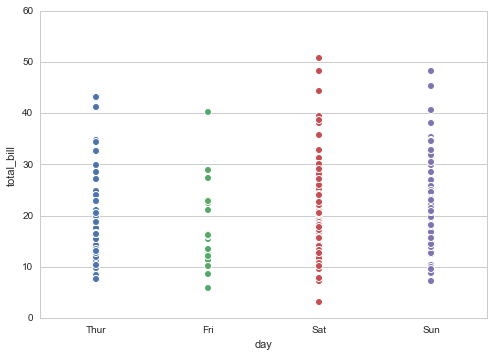

In [4]:
sns.stripplot(x = 'day',
              y = 'total_bill',
              data = tips);

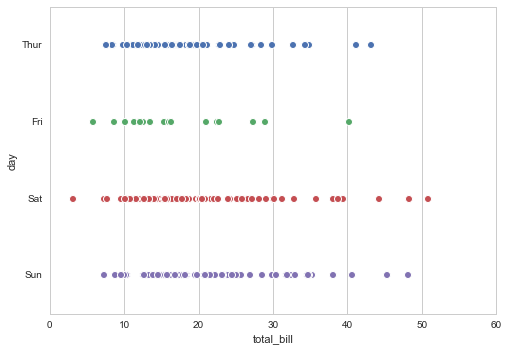

In [5]:
sns.stripplot(x = 'total_bill',
              y = 'day',
              data = tips);

### Add a nested categorical variable with the `hue` parameter

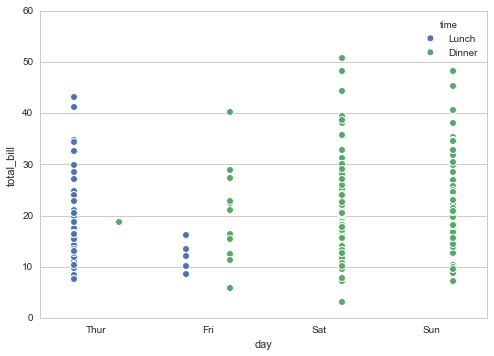

In [6]:
sns.stripplot(x = 'day',
              y = 'total_bill',
              hue = 'time',
              data = tips);

/Users/bartev/.virtualenvs/aost/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


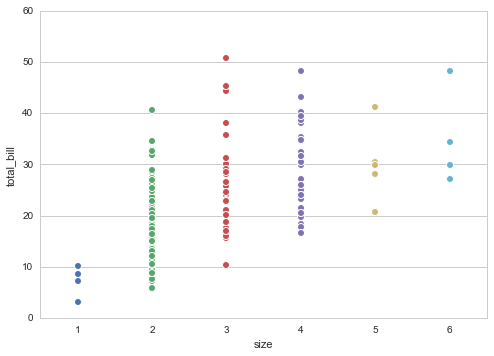

In [7]:
sns.stripplot(x = 'size',
              y = 'total_bill',
              data = tips.sort('size'));

## Boxplots

In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


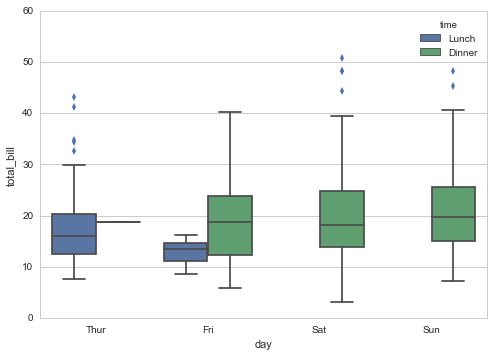

In [9]:
sns.boxplot(x = 'day',
            y = 'total_bill',
            hue = 'time',
            data = tips);

## Violinplots

Combine a boxplot with a kernel density estimation

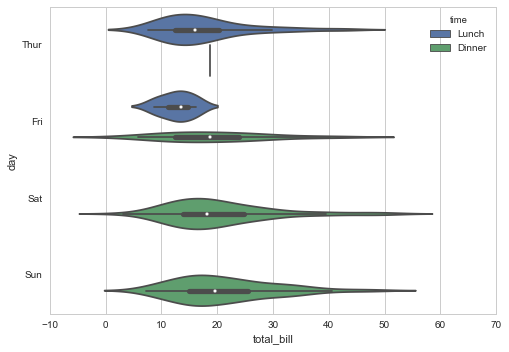

In [10]:
sns.violinplot(x = 'total_bill',
               y = 'day',
               hue = 'time',
               data = tips);

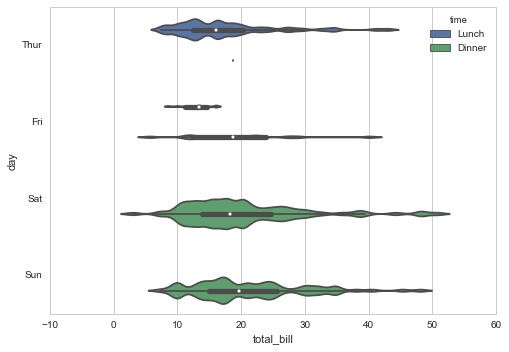

In [11]:
sns.violinplot(x = 'total_bill',
               y = 'day',
               hue = 'time',
               data = tips,
               bw = 0.1,
               scale = 'count',
               scale_hue = False);

### Split the violins when the hue parameter has only 2 levels

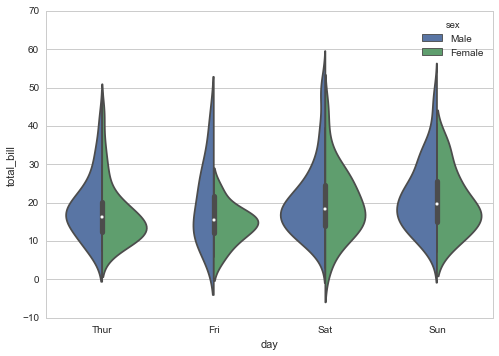

In [12]:
sns.violinplot(x = 'day',
               y = 'total_bill',
               hue = 'sex',
               data = tips,
               split = True);

* show individual observations in the violin 
* change the palette

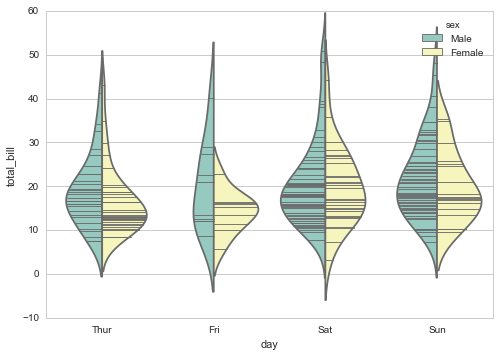

In [13]:
sns.violinplot(x = 'day',
               y = 'total_bill',
               hue = 'sex',
               data = tips,
               split = True,
               inner = 'stick',
               palette = 'Set3');

### Combine `stripplot` with `violinplot` or `boxplot`
to show each observation along with summary of distribution

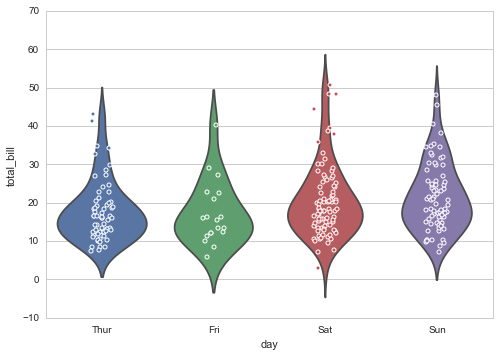

In [14]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips, inner = None)
sns.stripplot(x = 'day', y = 'total_bill', data = tips, 
              jitter = True, size = 4);

# Statistical estimation within categories

* Show central tendency of values instead of distribution within each category

## Bar plots

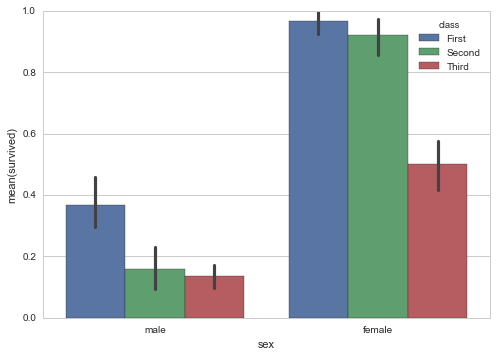

In [15]:
sns.barplot(x = 'sex',
            y = 'survived',
            hue = 'class',
            data = titanic);

### `countplot` - show number of observations in each category
instead of a statistic (like a histogram over a categorical var)

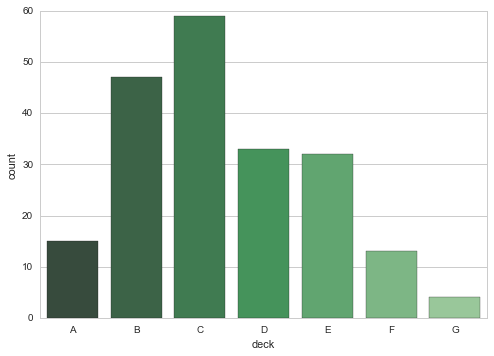

In [16]:
sns.countplot(x = 'deck',
              data = titanic,
              palette = 'Greens_d');

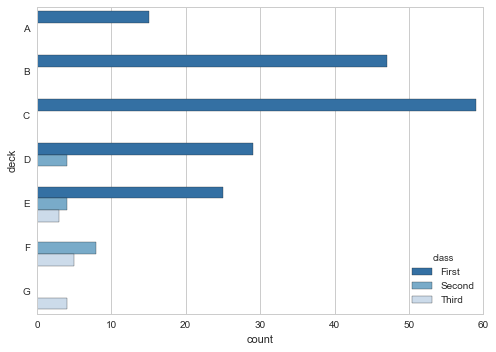

In [17]:
sns.countplot(y = 'deck',
              hue = 'class',
              data = titanic,
              palette = 'Blues_r');

## Point plots

* encode value of estimate with height on other axis
* plot a point and confidence interval instead of a bar 
* connect points from the same `hue` category

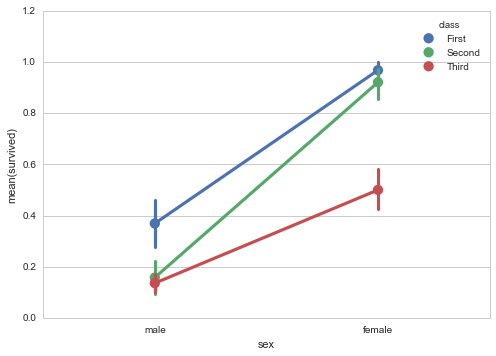

In [18]:
sns.pointplot(x = 'sex',
              y = 'survived',
              hue = 'class',
              data = titanic);

### Use different markers and line styles for the levels of the `hue`
category

Helps produce better figures in black and white 

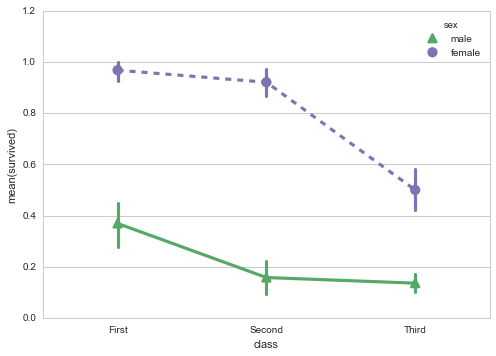

In [19]:
sns.pointplot(x = 'class',
              y = 'survived',
              hue = 'sex',
              data = titanic,
              palette = {'male' : 'g',
                         'female' : 'm'},
              markers = ['^', 'o'],
              linestyles = ['-', '--']);
                         

#  Drawing multi-panel categorical plots

* use higher-level function `factorplot()`
* combines above functions with `FacetGrid()`

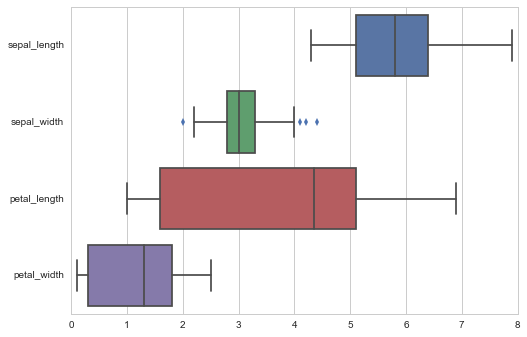

In [20]:
sns.boxplot(data = iris, orient = 'h');

In [21]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


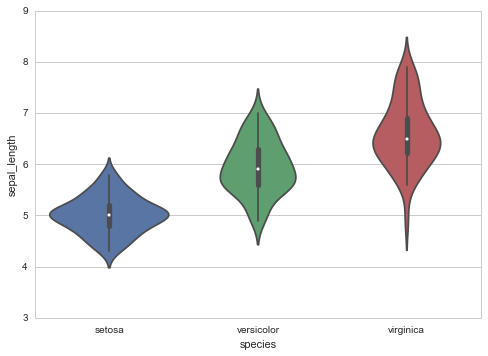

In [22]:
sns.violinplot(x = iris.species, y = iris.sepal_length);

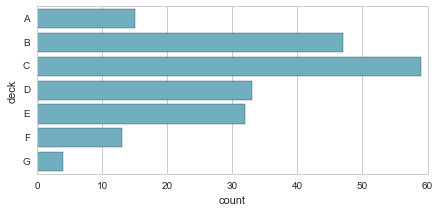

In [23]:
f, ax = plt.subplots(figsize = (7, 3))
sns.countplot(y = 'deck', data = titanic, color = 'c');

`factorplot` uses `pairplot` by default

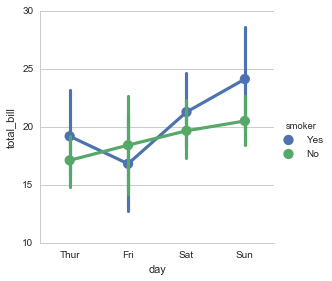

In [24]:
sns.factorplot(x = 'day', y = 'total_bill', hue = 'smoker', data = tips);

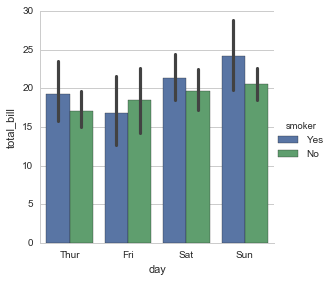

In [25]:
sns.factorplot(x = 'day', 
               y = 'total_bill', 
               hue = 'smoker', 
               data = tips,
               kind = 'bar');

### Add faceting by additional variables in the `DataFrame`,
such as along the columns 

Facet by time

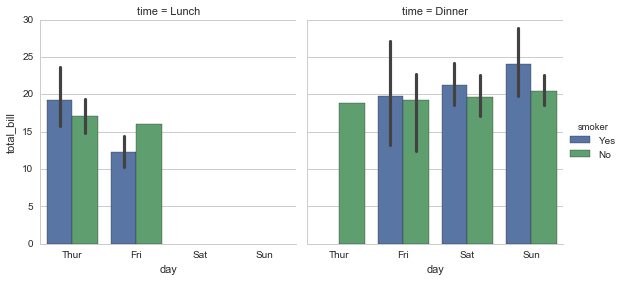

In [26]:
sns.factorplot(x = 'day', 
               y = 'total_bill', 
               hue = 'smoker', 
               data = tips,
               kind = 'bar',
               col = 'time');

/Users/bartev/.virtualenvs/aost/lib/python2.7/site-packages/seaborn/categorical.py:462: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


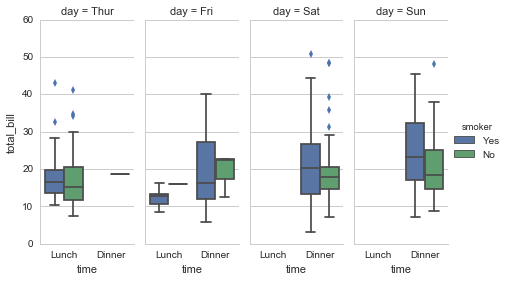

In [27]:
sns.factorplot(x = 'time', 
               y = 'total_bill', 
               hue = 'smoker', 
               col = 'day',
               data = tips,
               kind = 'box',
               size = 4,
               aspect = 0.4);

### Combine with `PairGrid` to show categorical relationships 
across several different variables

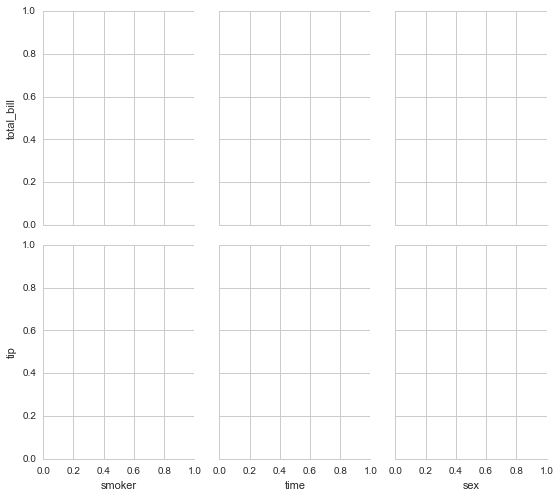

In [28]:
g = sns.PairGrid(tips,
                 x_vars = ['smoker', 'time', 'sex'],
                 y_vars = ['total_bill', 'tip'],
                 aspect = 0.75,
                 size = 3.5)

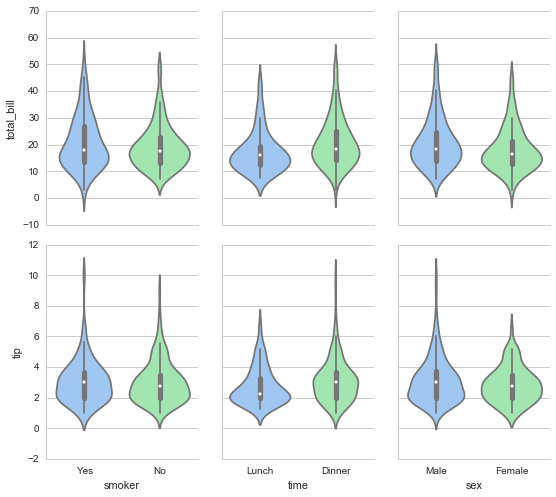

In [29]:
g = sns.PairGrid(tips,
                 x_vars = ['smoker', 'time', 'sex'],
                 y_vars = ['total_bill', 'tip'],
                 aspect = 0.75,
                 size = 3.5)
g.map(sns.violinplot, palette = 'pastel');